# Postprocessing for GABLS1 LES and PBL
## Smagorinsky with dx = dy = dz = 3.125 m 

In [168]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import types

import seaborn as sns
cb_colors = sns.color_palette('colorblind')
sns.set_palette(cb_colors)

from erftools.postprocessing import SurfaceHistory
from helpers import load_erf_les, load_erf_scm
import load_data # from exawind wind-energy repo

# Image formatting

In [169]:
# Save figures in high res
save_fig = True

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Presentations
plt.rcParams.update({
    "text.usetex": True,
    "figure.figsize": (10,10),
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 22,
    "font.weight": "bold",
    "lines.linewidth": 2,
    "lines.markeredgewidth": 2.0,
    "lines.markersize": 16,
    "axes.titlesize": 22,
    "axes.labelsize": 22,
    "axes.linewidth": 2.0,
    "xtick.major.width": 2.0,
    "xtick.minor.width": 1.0,
    "xtick.major.size": 4.0,
    "xtick.minor.size": 2.0,
    "xtick.direction": "in",
    "ytick.major.width": 2.0,
    "ytick.minor.width":1.0,
    "ytick.major.size": 4.0,
    "ytick.minor.size": 2.0,
    "ytick.direction": "in",
    "legend.fontsize": 16,
})

## Load the ERF and benchmark data

In [170]:
ERFcases = {
    'MYNN': load_erf_scm('GABLS1-MYNN'),
    'Smag': load_erf_les('GABLS1-LES-Smag'),
    'Dear': load_erf_les('GABLS1-LES-Dear'),
}

Loaded GABLS1-MYNN/profiles.nc
Loaded GABLS1-LES-Smag/averaged_profiles.nc
Loaded GABLS1-LES-Dear/averaged_profiles.nc


In [171]:
comps = {
    'AMR-Wind': load_data.AMRWindStats('gabls_data/AmrWindKsgs_3p125'),
    'Nalu-Wind': load_data.NaluWindStats('gabls_data/NaluWindRun03'),
    'GABLS: CORA': load_data.GABLSData('gabls_data/res_3.125m/CORA'),
    'GABLS: CSU': load_data.GABLSData('gabls_data/res_3.125m/CSU'),
    'GABLS: IMUK': load_data.GABLSData('gabls_data/res_3.125m/IMUK'),    
    'GABLS: LLNL': load_data.GABLSData('gabls_data/res_3.125m/LLNL'),   
    'GABLS: MO': load_data.GABLSData('gabls_data/res_3.125m/MO'),
    'GABLS: NCAR': load_data.GABLSData('gabls_data/res_3.125m/NCAR'),
    'GABLS: NERSC': load_data.GABLSData('gabls_data/res_3.125m/NERSC'),
    'GABLS: UIB': load_data.GABLSData('gabls_data/res_3.125m/UIB')
}

Reading  gabls_data/res_3.125m/CORA/CORA_B9_128.dat
diff z coord len for variances
diff z coord len for fluxes
Reading  gabls_data/res_3.125m/CSU/CSU_B9_128.dat
diff z coords for fluxes
Reading  gabls_data/res_3.125m/IMUK/IMUK_B9_128.dat
diff z coords for fluxes
Reading  gabls_data/res_3.125m/LLNL/LLNL_B9_128.dat
Reading  gabls_data/res_3.125m/MO/MO_B9_128.dat
diff z coords for variances
diff z coords for fluxes
Reading  gabls_data/res_3.125m/NCAR/NCAR_B9_128.dat
diff z coord len for fluxes
Reading  gabls_data/res_3.125m/NERSC/NERSC_B9_128.dat
Reading  gabls_data/res_3.125m/UIB/UIB_B9_128.dat


/home/alattanz/git/validation/GABLS1/load_data.py:137: RuntimeWarning: invalid value encountered in sqrt
  self.hvelmag = np.sqrt(self.u*self.u + self.v+self.v)


In [172]:
styles = {}
i = 0
for case in comps.keys():
    if case.startswith('GABLS:'):
        styles[case] = dict(c=cb_colors[i],alpha=0.25)
        i = i + 1
styles['MYNN']            = dict(c='k',         lw=1,ls='--')
styles['Smag']            = dict(c=cb_colors[0],lw=2)
styles['Smag (large dt)'] = dict(c=cb_colors[0],lw=2,ls='--')
styles['Dear']            = dict(c=cb_colors[1],lw=2)
styles['AMR-Wind']        = dict(c=cb_colors[2],lw=3,ls=':')
styles['Nalu-Wind']       = dict(c=cb_colors[3],lw=3,ls=':')

# tweaks
# styles['ERF'] = dict(c='k',lw=1)
# styles['GABLS: IMUK']['alpha'] = 1

## Velocity profiles

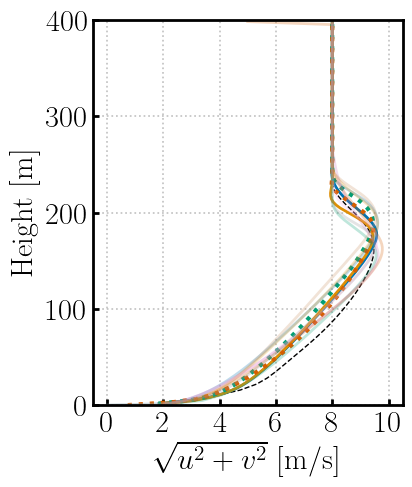

In [173]:
fig,ax = plt.subplots(figsize=(4,5))
for case,ds in ERFcases.items():
    ax.plot(ds['hvelmag'], ds.z, label='ERF '+case, **styles[case])

for case,dat in comps.items():
    ax.plot(dat.hvelmag, dat.z, label=case, **styles[case])

#ax.legend(loc='upper left',bbox_to_anchor=(1,1))
ax.set_xlabel(r"$\sqrt{u^2 + v^2}$ [m/s]")
ax.set_ylabel('Height [m]')
ax.set_ylim(0,400)
ax.set_yticks(np.arange(0, 500, step=100))
ax.set_xlim(-0.5,10.5)
ax.set_xticks(np.arange(0, 12, step=2))
ax.grid(linewidth=1.25,linestyle=':',alpha=0.75)
if (save_fig):
    plt.savefig("GABLS_vel_prof.png",dpi=300,bbox_inches='tight')

## Temperature profiles

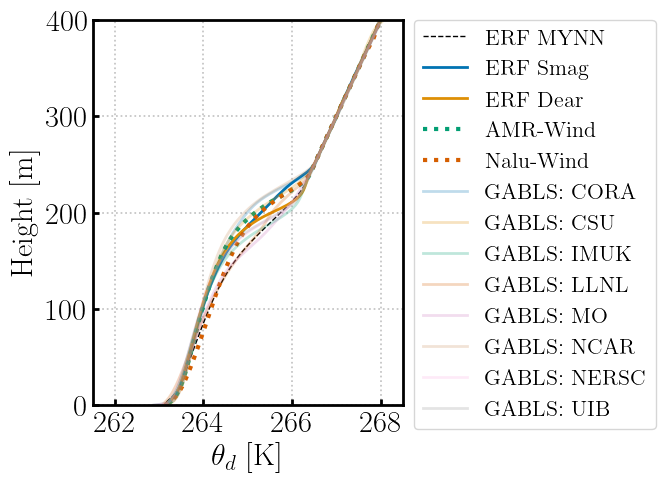

In [174]:
fig,ax = plt.subplots(figsize=(4,5))
for case,ds in ERFcases.items():
    ax.plot(ds['θ'], ds.z, label='ERF '+case, **styles[case])

for case,dat in comps.items():
    ax.plot(dat.T, dat.z, label=case, **styles[case])

ax.legend(loc='upper left',bbox_to_anchor=(1,1.03))
ax.set_xlabel(r"$\theta_{d}$ [K]")
ax.set_ylabel('Height [m]')
ax.set_ylim(0,400)
ax.set_yticks(np.arange(0, 500, step=100))
ax.set_xlim(261.5,268.5)
ax.set_xticks(np.arange(262, 270, step=2))
ax.grid(linewidth=1.25,linestyle=':',alpha=0.75)
if (save_fig):
    plt.savefig("GABLS_theta_prof.png",dpi=300,bbox_inches='tight')

## ustar

In [175]:
for case,dat in comps.items():
    print(f"{case} utau = {dat.istats['ustar']}")

AMR-Wind utau = 0.2588033570460519
Nalu-Wind utau = 0.41
GABLS: CORA utau = 0.28243208580246915
GABLS: CSU utau = 0.30887763076923075
GABLS: IMUK utau = 0.2909560131147541
GABLS: LLNL utau = 0.26615887606557376
GABLS: MO utau = 0.2557627536061026
GABLS: NCAR utau = 0.29450447527545176
GABLS: NERSC utau = 0.27756252
GABLS: UIB utau = 0.25922671311475404


In [176]:
surf = SurfaceHistory('GABLS1-LES-Smag/surf_hist.dat').df
surf.loc[slice(surf.index[-1]-3600,None)].mean()

ustar      0.270772
tstar      0.043727
L        109.728858
dtype: float64

In [177]:
surf = SurfaceHistory('GABLS1-LES-Dear/surf_hist.dat').df
surf.loc[slice(surf.index[-1]-3600,None)].mean()

ustar      0.274554
tstar      0.043412
L        113.623711
dtype: float64

In [178]:
## Function to move scientific notation label

In [179]:
class Labeloffset():
    def __init__(self,  ax, label="", axis="y"):
        self.axis = {"y":ax.yaxis, "x":ax.xaxis}[axis]
        self.label=label
        ax.callbacks.connect(axis+'lim_changed', self.update)
        ax.figure.canvas.draw()
        self.update(None)

    def update(self, lim):
        fmt = self.axis.get_major_formatter()
        self.axis.offsetText.set_visible(False)
        self.axis.set_label_text(self.label + " "+ fmt.get_offset() )

## Turbulent flux profiles

Nalu-Wind doesnt have heat flux output


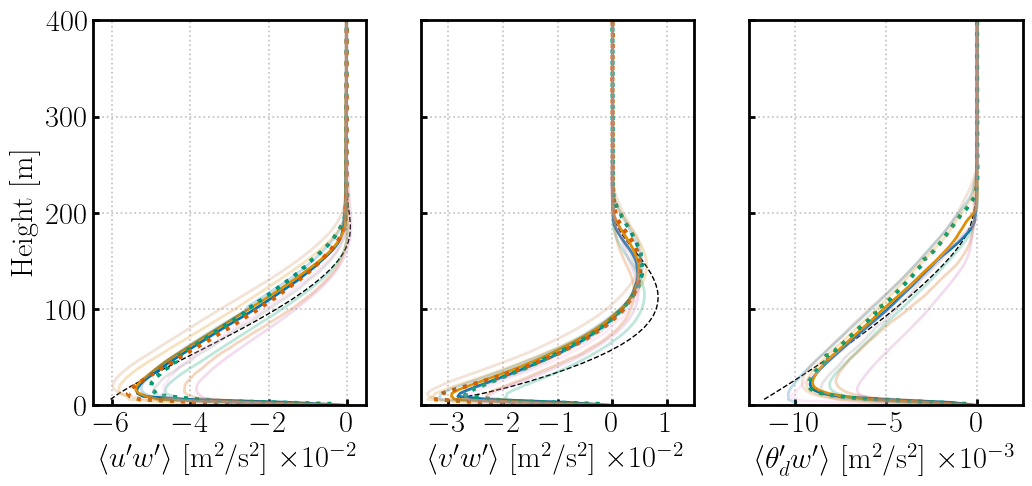

In [180]:
fig,axs = plt.subplots(ncols=3,sharey=True,figsize=(12,5))
for case,ds in ERFcases.items():
    axs[0].plot(ds["u'w'"], ds.zstag, label='ERF '+case, **styles[case])
    axs[1].plot(ds["v'w'"], ds.zstag, label='ERF '+case, **styles[case])
    axs[2].plot(ds["θ'w'"], ds.zstag, label='ERF '+case, **styles[case])

for case,dat in comps.items():
    z = dat.z_flux if hasattr(dat,'z_flux') else dat.z
    axs[0].plot(dat.vel_var["u'w'"], z, label=case, **styles[case])
    axs[1].plot(dat.vel_var["v'w'"], z, label=case, **styles[case])
    if hasattr(dat,'hfx'):
        axs[2].plot(dat.hfx, z, label=case, **styles[case])
    else:
        print(case,'doesnt have heat flux output')
        # dummy plot
        axs[2].plot([0,0],[-1,-1], label=case, **styles[case])

#axs[-1].legend(loc='upper left',bbox_to_anchor=(1,1))
axs[0].set_xlabel(r'$\langle u^\prime w^\prime \rangle$ [m$^2$/s$^2$]')
axs[1].set_xlabel(r'$\langle v^\prime w^\prime \rangle$ [m$^2$/s$^2$]')
axs[2].set_xlabel(r'$\langle \theta^\prime w^\prime \rangle$ [K m/s]')
axs[0].set_ylabel('Height [m]')

# Axis bounds        
axs[0].set_ylim(0,400)
axs[0].set_yticks(np.arange(0, 500, step=100))
axs[0].ticklabel_format(style='sci',axis='x',scilimits=(-2,-2))
axs[0].set_xlim(-0.065,0.005)
axs[0].set_xticks(np.arange(-0.06, 0.01, step=0.02))
lo = Labeloffset(axs[0], label=r'$\langle u^\prime w^\prime \rangle$ [m$^2$/s$^2$]', axis="x")

axs[1].set_ylim(0,400)
axs[1].set_yticks(np.arange(0, 500, step=100))
axs[1].ticklabel_format(style='sci',axis='x',scilimits=(-2,-2))
axs[1].set_xlim(-0.035,0.015)
axs[1].set_xticks(np.arange(-0.03, 0.02, step=0.01))
lo = Labeloffset(axs[1], label=r'$\langle v^\prime w^\prime \rangle$ [m$^2$/s$^2$]', axis="x")

axs[2].set_ylim(0,400)
axs[2].set_yticks(np.arange(0, 500, step=100))
axs[2].ticklabel_format(style='sci',axis='x',scilimits=(-3,-3))
axs[2].set_xlim(-0.0125,0.0025)
axs[2].set_xticks(np.arange(-0.01, 0.001, step=0.005))
lo = Labeloffset(axs[2], label=r'$\langle \theta_{d}^\prime w^\prime \rangle$ [m$^2$/s$^2$]', axis="x")

for ax in axs:
    ax.grid(linewidth=1.25,linestyle=':',alpha=0.75)
if (save_fig):
    plt.savefig("GABLS_resolved_fluxes_prof.png",dpi=300,bbox_inches='tight')

## Variance profiles

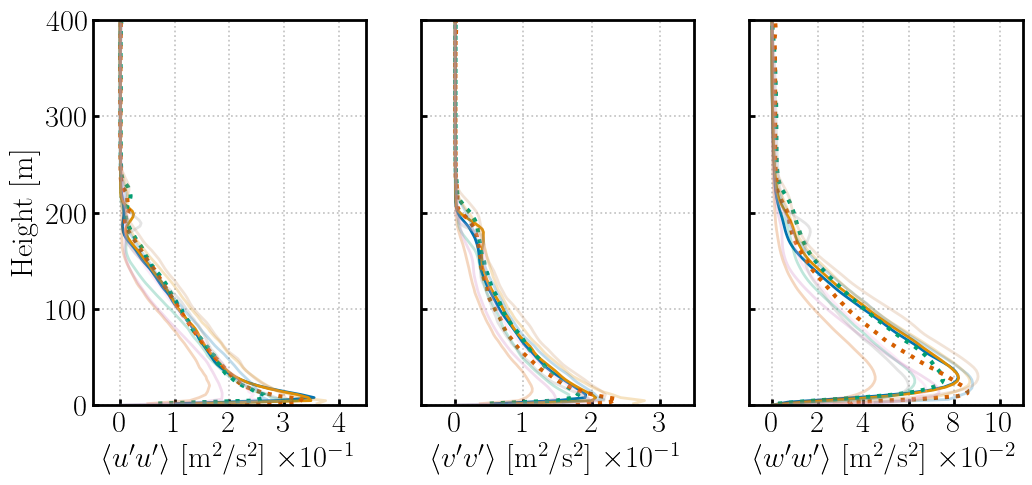

In [181]:
fig,axs = plt.subplots(ncols=3,sharey=True,figsize=(12,5))
for case,ds in ERFcases.items():
    if "u'u'" not in ds.data_vars:
        continue
    axs[0].plot(ds["u'u'"], ds.z,     label='ERF '+case, **styles[case])
    axs[1].plot(ds["v'v'"], ds.z,     label='ERF '+case, **styles[case])
    axs[2].plot(ds["w'w'"], ds.zstag, label='ERF '+case, **styles[case])

for case,dat in comps.items():
    z = dat.z_var if hasattr(dat,'z_var') else dat.z
    axs[0].plot(dat.vel_var["u'u'"], z, label=case, **styles[case])
    axs[1].plot(dat.vel_var["v'v'"], z, label=case, **styles[case])
    axs[2].plot(dat.vel_var["w'w'"], z, label=case, **styles[case])

#axs[-1].legend(loc='upper left',bbox_to_anchor=(1,1))
axs[0].set_xlabel(r'$\langle u^\prime u^\prime \rangle$ [m$^2$/s$^2$]')
axs[1].set_xlabel(r'$\langle v^\prime v^\prime \rangle$ [m$^2$/s$^2$]')
axs[2].set_xlabel(r'$\langle w^\prime w^\prime \rangle$ [m$^2$/s$^2$]')
axs[0].set_ylabel('Height [m]')

# Axis bounds        
axs[0].set_ylim(0,400)
axs[0].set_yticks(np.arange(0, 500, step=100))
axs[0].ticklabel_format(style='sci',axis='x',scilimits=(-1,-1))
axs[0].set_xlim(-0.05,0.45)
axs[0].set_xticks(np.arange(0.0, 0.5, step=0.1))
lo = Labeloffset(axs[0], label=r'$\langle u^\prime u^\prime \rangle$ [m$^2$/s$^2$]', axis="x")

axs[1].set_ylim(0,400)
axs[1].set_yticks(np.arange(0, 500, step=100))
axs[1].ticklabel_format(style='sci',axis='x',scilimits=(-1,-1))
axs[1].set_xlim(-0.05,0.35)
axs[1].set_xticks(np.arange(0.0, 0.4, step=0.1))
lo = Labeloffset(axs[1], label=r'$\langle v^\prime v^\prime \rangle$ [m$^2$/s$^2$]', axis="x")

axs[2].set_ylim(0,400)
axs[2].set_yticks(np.arange(0, 500, step=100))
axs[2].ticklabel_format(style='sci',axis='x',scilimits=(-2,-2))
axs[2].set_xlim(-0.01,0.11)
axs[2].set_xticks(np.arange(0.0, 0.105, step=0.02))
lo = Labeloffset(axs[2], label=r'$\langle w^\prime w^\prime \rangle$ [m$^2$/s$^2$]', axis="x")

for ax in axs:
    ax.grid(linewidth=1.25,linestyle=':',alpha=0.75)
if (save_fig):
    plt.savefig("GABLS_resolved_variances_prof.png",dpi=300,bbox_inches='tight')